# Supervised Learning - Classification

In [1]:
from sklearn.model_selection import cross_val_score

In [2]:
%pylab inline
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/terrain.csv")

X = df[["bumpiness","grade"]].values
y = df["target"]

def draw(clf,X,y,h=0.05):
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

Populating the interactive namespace from numpy and matplotlib


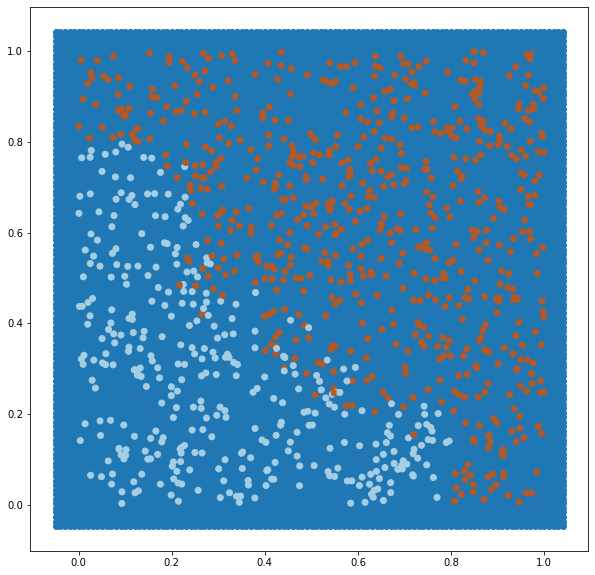

In [3]:
draw(None,X,y,0.01)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
clf = LogisticRegression()

In [6]:
clf.fit(X,y)

LogisticRegression()

In [7]:
cross_val_score(clf,X,y,scoring='neg_mean_absolute_error').mean()

-0.07100000000000001

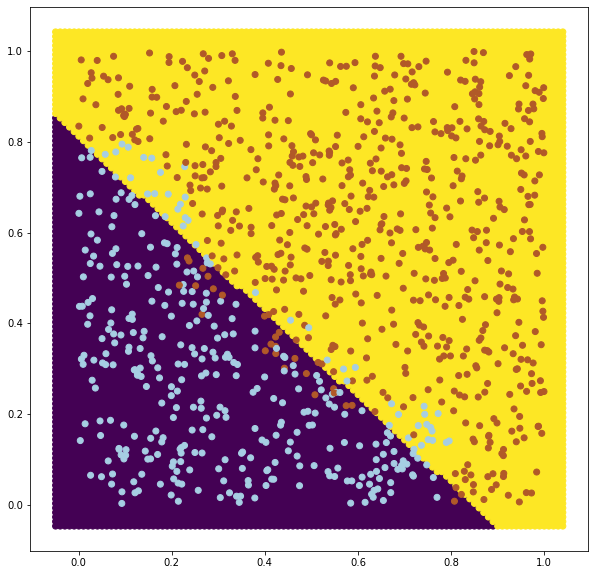

In [8]:
draw(clf,X,y,0.01)

# Metric: Accuracy
Precisión o % de aciertos

In [9]:
cross_val_score(clf,X,y, scoring='accuracy').mean()

0.9289999999999999

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
clfk = KNeighborsClassifier(n_neighbors=2)

In [12]:
clfk.fit(X,y)

KNeighborsClassifier(n_neighbors=2)

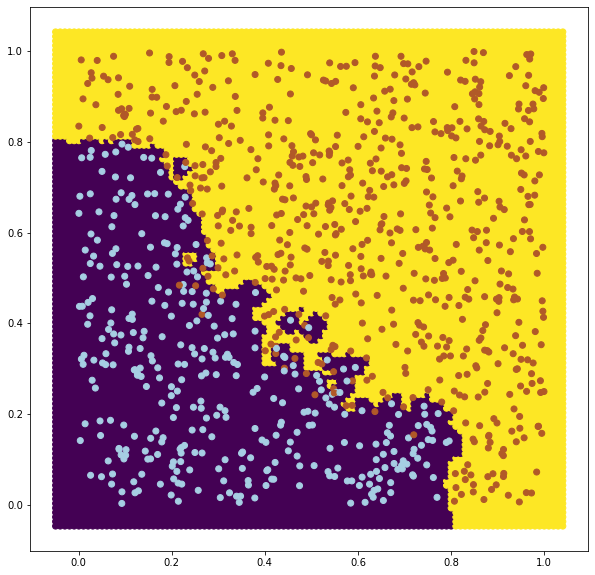

In [13]:
draw(clfk,X,y,0.01)

In [14]:
cross_val_score(clfk,X,y, scoring='accuracy').mean()

0.933

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [16]:
clfk_gs = GridSearchCV(KNeighborsClassifier(),
                      param_grid={'n_neighbors':np.arange(2,100)},
                      scoring='accuracy')
clfk_gs.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='accuracy')

In [17]:
clfk_gs.best_params_

{'n_neighbors': 16}

In [18]:
clfk = KNeighborsClassifier(n_neighbors=16)

In [19]:
clfk.fit(X,y)

KNeighborsClassifier(n_neighbors=16)

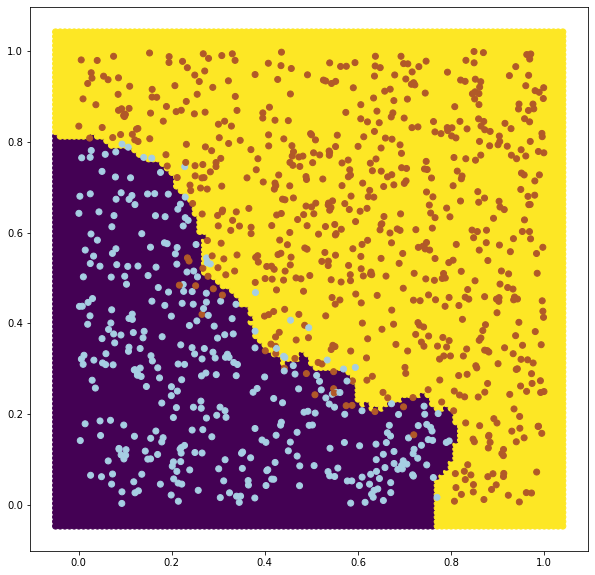

In [20]:
draw(clfk,X,y,0.01)

In [21]:
cross_val_score(clfk,X,y, scoring='accuracy').mean() # Con k = 16 un 95,7 % de accuracy

0.9570000000000001

Dibujarlo directamente con "best estimator":

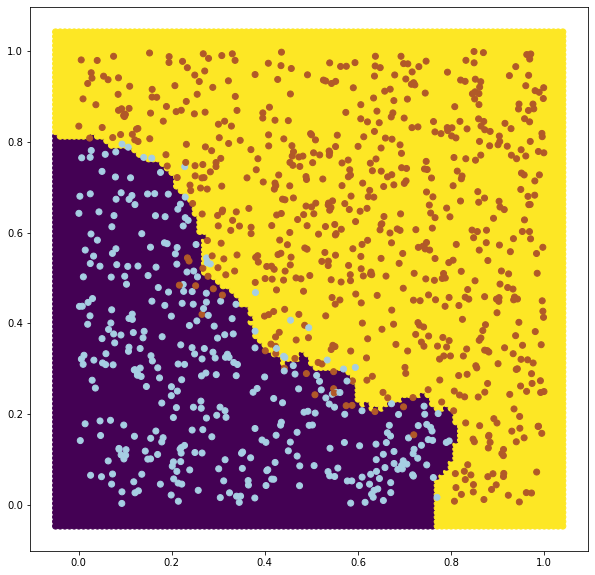

In [22]:
draw(clfk_gs.best_estimator_,X,y,0.01) 

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

(array([73., 68., 93., 62., 93., 85., 93., 75., 77., 81.]),
 array([4.05939697e-04, 1.00356129e-01, 2.00306317e-01, 3.00256506e-01,
        4.00206695e-01, 5.00156884e-01, 6.00107073e-01, 7.00057262e-01,
        8.00007451e-01, 8.99957640e-01, 9.99907829e-01]),
 <a list of 10 Patch objects>)

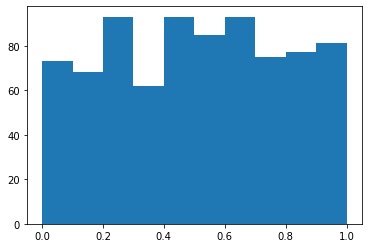

In [24]:
plt.hist(X_train[:,0])

(array([19., 24., 22., 14., 13., 15., 19., 22., 26., 26.]),
 array([0.02038002, 0.11827026, 0.21616051, 0.31405075, 0.411941  ,
        0.50983124, 0.60772149, 0.70561173, 0.80350198, 0.90139222,
        0.99928247]),
 <a list of 10 Patch objects>)

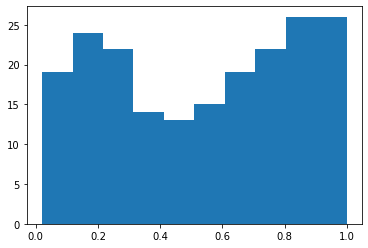

In [25]:
plt.hist(X_test[:,0])

# Metrics: Precision and Recall

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
# cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Repasar Pecision y Recall

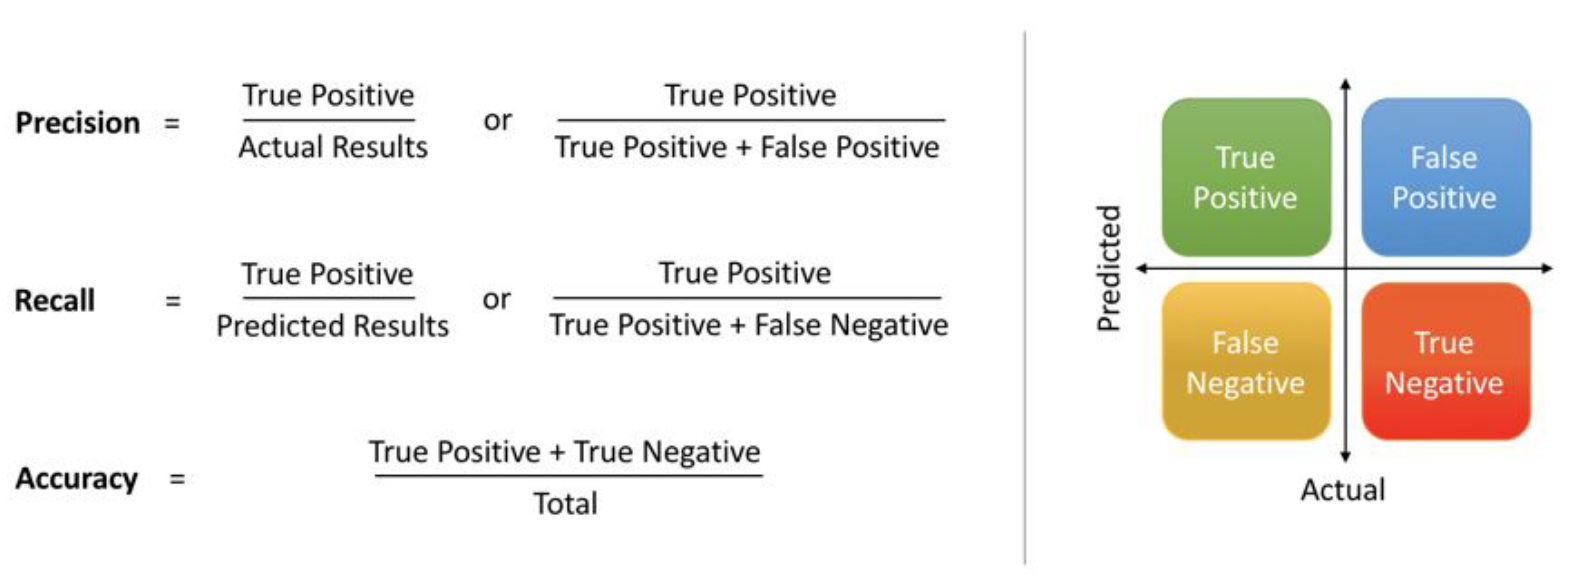

In [27]:
confusion_matrix(y_test, clfk.predict(X_test))

array([[ 70,   4],
       [  3, 123]], dtype=int64)

In [28]:
print(classification_report(y_test,clfk.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        74
         1.0       0.97      0.98      0.97       126

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
# Ver Notebook

In [29]:
from sklearn.metrics import precision_score
precision_score(y_test,clfk.predict(X_test), labels =[1])

0.968503937007874

In [30]:
from sklearn.metrics import make_scorer

def prec_fast(y_test, pred):
  return sum(y_test[pred==1])/len(y_test[pred==1])

clf_gk = GridSearchCV(KNeighborsClassifier(),
                      param_grid={'n_neighbors':np.arange(1,100)},
                      scoring = make_scorer(prec_fast))
clf_gk.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring=make_scorer(prec_fast))

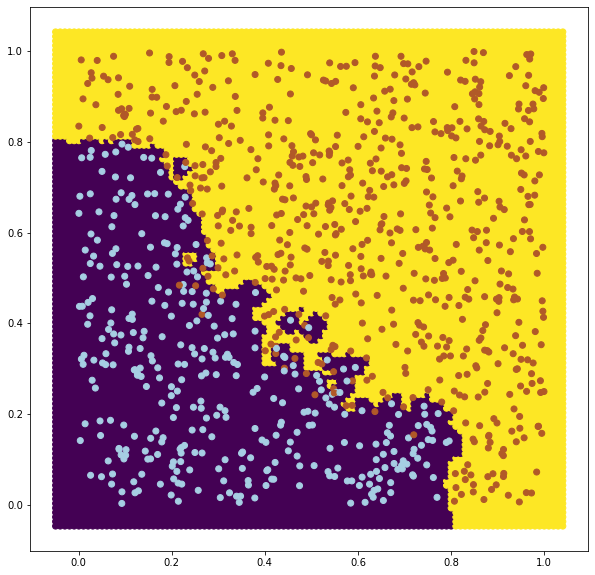

In [31]:
draw(clf_gk.best_estimator_,X,y,0.01)

# Support Vector Machine (SVM)

https://scikit-learn.org/stable/modules/svm.html

In [32]:
from sklearn.svm import SVC

In [33]:
# clf = SVC(kernel='linear', C = [.1,1,10,100]) - Lineal

clf_gsl = GridSearchCV(SVC(kernel='linear'),
                      param_grid={'C':[.1,1,10,100,1000]},
                      scoring = 'accuracy')
clf_gsl.fit(X,y)


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, scoring='accuracy')

In [34]:
clf_gsl.best_params_

{'C': 100}

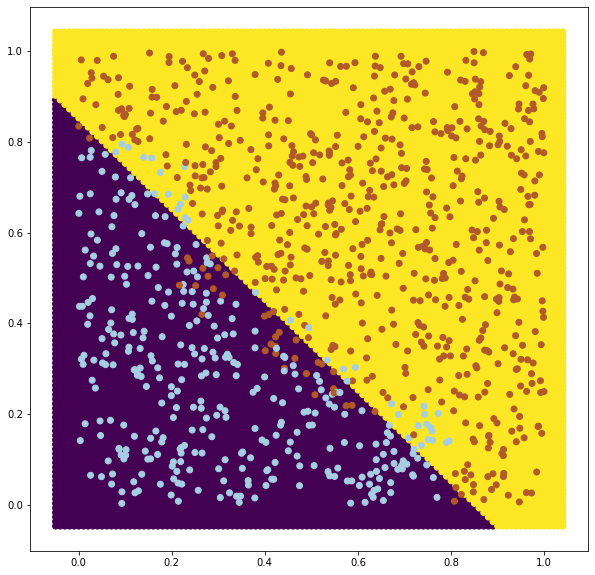

In [35]:
draw(clf_gsl.best_estimator_,X,y,0.01)

In [36]:
# clf = SVC(kernel='rbf', gamma = [1,10,100]) - RBF

clf_gsrbf = GridSearchCV(SVC(kernel='rbf'),
                      param_grid={'C':[.1,1,10,100,1000],
                                  'gamma':[1,10,100]},
                      scoring = 'accuracy')
clf_gsrbf.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 10, 100]},
             scoring='accuracy')

In [37]:
clf_gsrbf.best_params_

{'C': 100, 'gamma': 10}

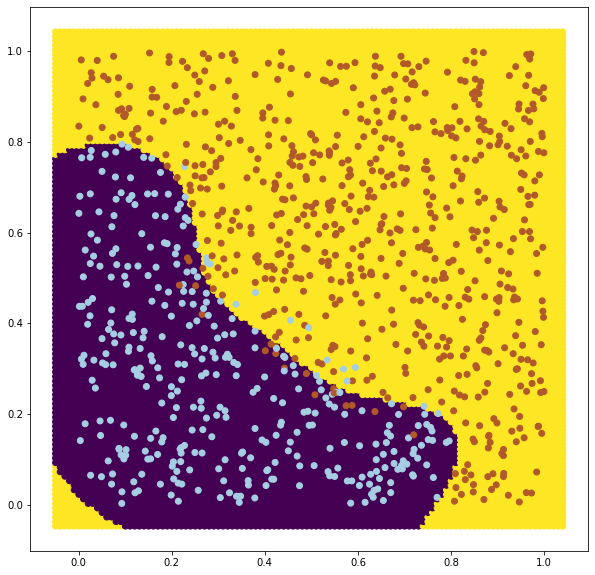

In [38]:
draw(clf_gsrbf.best_estimator_,X,y,0.01)

In [39]:
# clf = SVC(kernel='poly', degree = [2,3]) - Polinómico

clf_gsp = GridSearchCV(SVC(kernel='poly'),
                      param_grid={'C':[.1,1,10,100,1000],
                                  'degree':[2,3,4]},
                      scoring = 'accuracy')
clf_gsp.fit(X,y)

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4]},
             scoring='accuracy')

In [40]:
clf_gsp.best_params_

{'C': 1000, 'degree': 4}

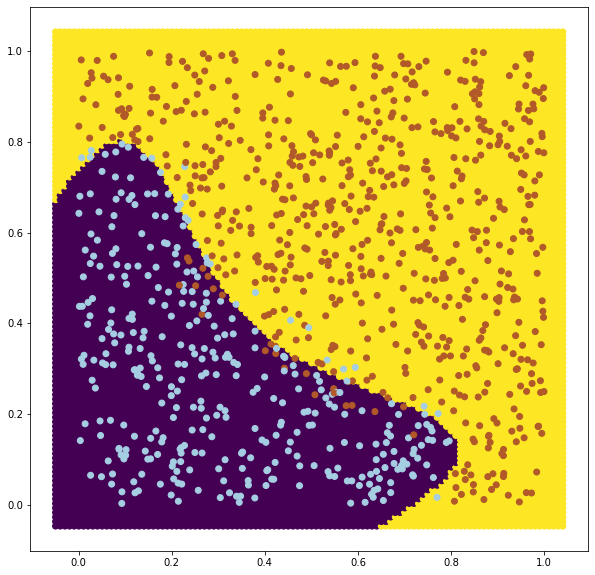

In [41]:
draw(clf_gsp.best_estimator_,X,y,0.01)

In [42]:
cross_val_score(clf_gsl.best_estimator_,X,y, scoring='accuracy').mean()

0.929

In [43]:
cross_val_score(clf_gsrbf.best_estimator_,X,y, scoring='accuracy').mean()

0.958

In [44]:
cross_val_score(clf_gsp.best_estimator_,X,y, scoring='accuracy').mean()

0.9530000000000001

# Decision Tree

In [45]:
# Import library
from sklearn.tree import DecisionTreeClassifier

# Create instance
# clf = DecisionTreeClassifier(min_samples_leaf=20,max_depth=3)

# Fit the data
# clf.fit(X,y)

In [46]:
clf_gsdt = GridSearchCV(DecisionTreeClassifier(),
                      param_grid={'max_depth':np.arange(2,11),
                                  'min_samples_leaf':np.arange(10,100,1)},
                      scoring = 'accuracy')
clf_gsdt.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])},
             scoring='accuracy')

In [47]:
clf_gsdt.best_params_

{'max_depth': 5, 'min_samples_leaf': 26}

In [48]:
cross_val_score(clf_gsdt.best_estimator_,X,y, scoring='accuracy').mean()

0.943

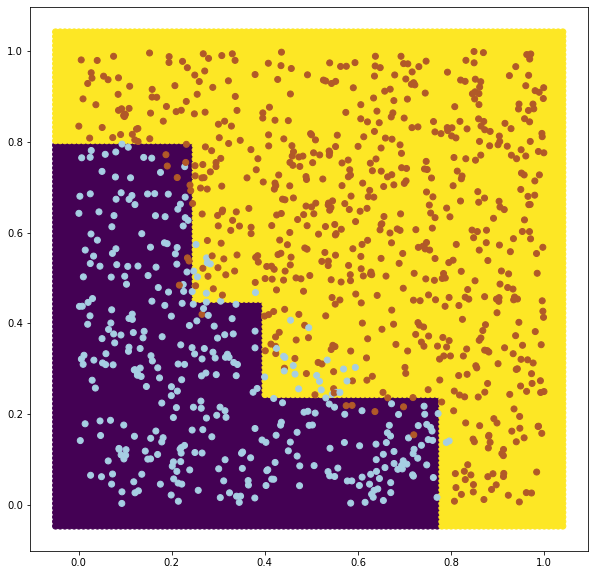

In [49]:
draw(clf_gsdt.best_estimator_,X,y,0.01)

In [51]:
# clf_gsdt.best_estimator_.predict_proba(X_test)

clf_gsdt.best_estimator_.predict_proba(X_test)[:,0]>.2


array([ True,  True,  True, False,  True,  True,  True, False, False,
        True, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True, False,  True, False,  True, False,  True,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
        True, False,

# Metric: Curva ROC

You can change the threshold and calculate:
- Number of True Positives: Correctly predicted as 1
- Number of False Positives: Incorrectly predicted as 1
The ROC Curve shows how confident
your classifier is, with the area under this
curve.

Medir la confianza que tiene el modelo de sí mismo

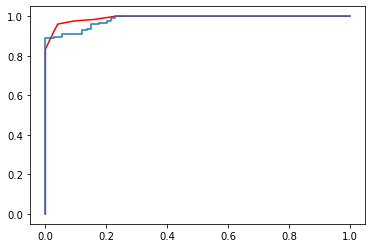

In [52]:
# Load the library
from sklearn.metrics import roc_curve

# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clf_gsdt.best_estimator_.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp,c="red")
fp,tp,_ = roc_curve(y_test,clf.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
clf_rf = RandomForestClassifier() # n_estimators=100 por defecto

In [55]:
clf_rf.fit(X,y)

RandomForestClassifier()

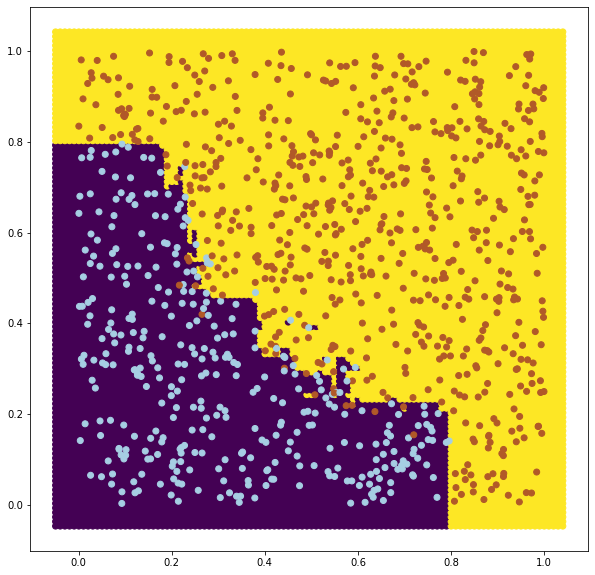

In [56]:
draw(clf_rf,X,y,0.01)

In [57]:
clf_gsrf = GridSearchCV(RandomForestClassifier(n_estimators=60),
                      param_grid={'max_depth':np.arange(2,11),
                                  'min_samples_leaf':np.arange(10,100,10)},
                      scoring = 'accuracy')
clf_gsrf.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=60),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='accuracy')

In [58]:
clf_gsrf.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

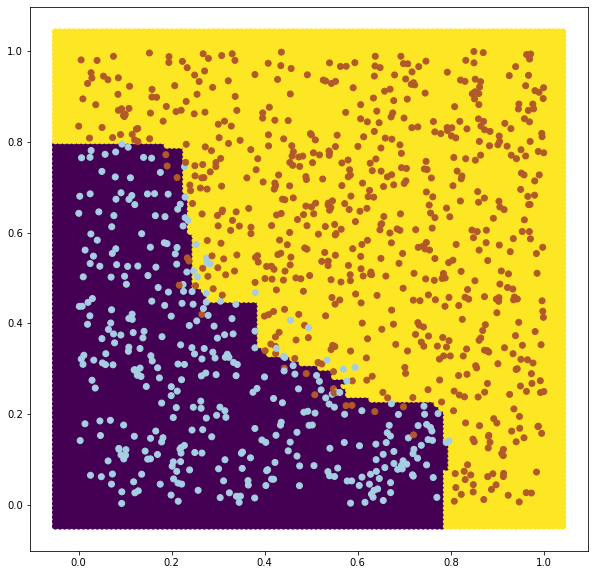

In [ ]:
draw(clf_gsrf.best_estimator_,X,y,0.01)

# Gradient Boosted Trees (GBoost)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
clf_gb = GridSearchCV(GradientBoostingClassifier(learning_rate=.1),
                      param_grid={'max_depth':np.arange(2,11),
                                  'min_samples_leaf':np.arange(10,100,15)},
                      scoring='accuracy')
clf_gb.fit(X,y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='accuracy')

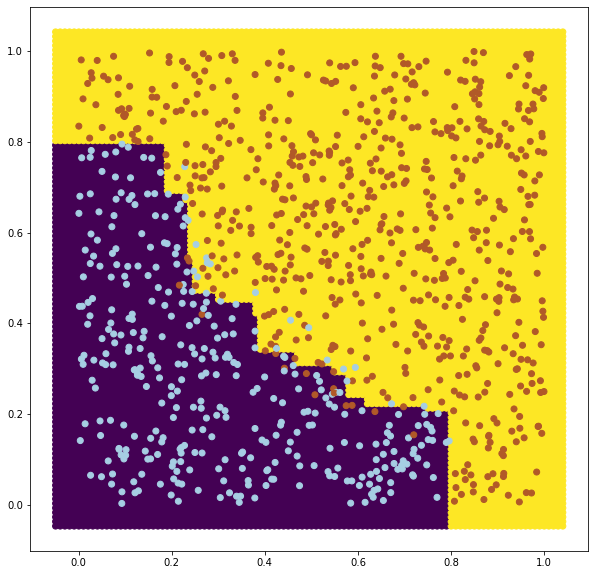

In [61]:
draw(clf_gb.best_estimator_,X,y,0.01)